this script plot the publication reduction across worlds and across continents

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

In [2]:
red_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_pf_reduction.csv'
region_path="../../data/nf_folder/Data/AdditionalData/cntry_region.xlsx"

In [3]:
plot_path="../../data/nf_folder/Figs/pub_reduction_global.pdf"

In [4]:
red_df=pd.read_csv(red_path)
red_df.head()

,cntry,raw,filter,prop
0,Afghanistan,399,343,0.140351
1,Albania,1424,1272,0.106742
2,Algeria,25049,23270,0.071021
3,Andorra,69,59,0.144928
4,Angola,482,353,0.267635


investigate how many countries with reduction larger than 0.4

In [5]:
red_df[red_df.prop>0.4].shape

(11, 4)

In [6]:
red_df.loc[red_df['prop']>=0.4,'prop']=0.4

In [7]:
region_df=pd.read_excel(region_path)[['cntry','region2']]
region_df.head()

,cntry,region2
0,Algeria,Africa
1,Angola,Africa
2,Belgian Congo,Africa
3,Benin,Africa
4,Botswana,Africa


In [8]:
red_df=red_df.merge(region_df,on='cntry',how='left')
red_df=red_df.dropna() #drop antarctica

In [8]:
world_geo=gp.read_file("../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp")
world_geo=world_geo[['WoS','Code','geometry']]
world_geo=world_geo[world_geo.WoS!='Antarctica']
world_geo.head(2)

,WoS,Code,geometry
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."


In [9]:
def plot_worldmap(ax, fig, basemap, data, plotcolumn, cmap, vmin, vmax,legend_title):
    """plot a basemap and color the country based on the column passed into
    """

    basemap.plot(ax=ax, linewidth=0.25, edgecolor="#8C8C8C", facecolor="#ffffff")
    data.plot(column=plotcolumn, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax)
    ax.axis("off")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    clb = fig.colorbar(sm, cax=cax)
    clb.ax.set_title(legend_title)

    return fig, ax

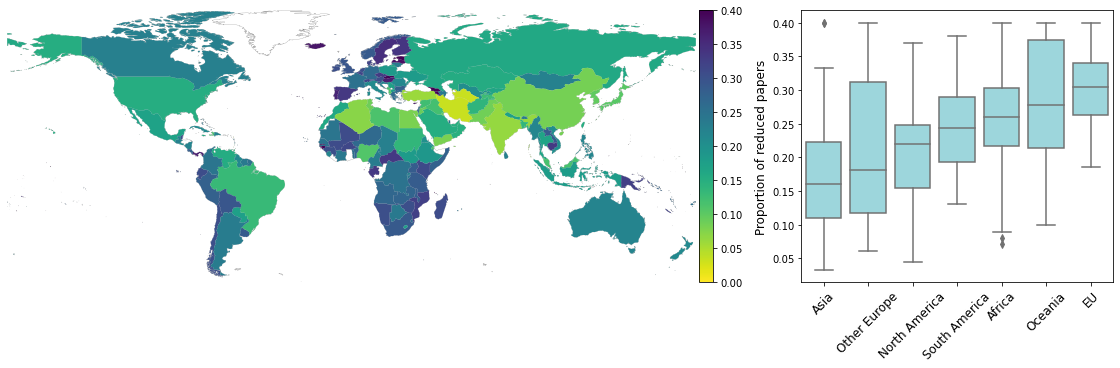

In [47]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [70, 30],'wspace': 0.15},figsize=(20,5))
plot_data=world_geo.merge(red_df[['cntry','prop']],left_on='WoS',right_on='cntry')
plot_data=gp.GeoDataFrame(plot_data)
plot_worldmap(ax[0], fig, world_geo, plot_data, 'prop','viridis_r',0.0,0.4,'')
ax[0].margins(0)

sns.boxplot(x='region2',y='prop',data=red_df,color='#92DFE6',
            order=['Asia','Other Europe','North America','South America','Africa','Oceania','EU'],ax=ax[1])
ax[1].set_ylabel('Proportion of reduced papers',fontsize=12)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['Asia','Other Europe','North America','South America','Africa','Oceania','EU']
                      ,rotation=45,fontsize=12)
plt.savefig(plot_path,bbox_inches='tight')

In [10]:
red_df[red_df.region2=='Oceania']

,cntry,raw,filter,prop,region2
9,Australia,441305,344647,0.219028,Oceania
42,Cook Islands,34,19,0.400000,Oceania
60,Federated States of Micronesia,110,96,0.127273,Oceania
61,Fiji,958,714,0.254697,Oceania
65,French-Polynesia,804,578,0.281095,Oceania
95,Kiribati,25,15,0.400000,Oceania
114,Marshall Islands,27,24,0.111111,Oceania
125,Nauru,5,2,0.400000,Oceania
129,New Zealand,72043,56786,0.211776,Oceania
130,New-Caledonia,1538,1042,0.322497,Oceania
